In [1]:
import numpy as np
import matplotlib.pyplot as plt

### overleaf

In [2]:
txt = "88.49 ± 0.07 86.03 ± 0.20 87.92 ± 0.22 87.75 ± 0.19"

x = txt.split(" ")

mean = [x[0], x[3], x[6], x[9]]
sd   = [x[2], x[5], x[8], x[11]]

mean = [float(x) for x in mean] 
sd   = [float(x) for x in sd] 

print(mean)
print(sd)

[88.49, 86.03, 87.92, 87.75]
[0.07, 0.2, 0.22, 0.19]


## Table - fmnist_lenet-5_linear0.8-0.2_gloss_scaffold_non-iidness

In [3]:
r1_av = [81.26, 66.91, 79.78, 78.56]
r1_sd = [1.21, 2.41, 1.33, 2.26]

r2_av = [86.73, 83.8, 85.87, 86.01]
r2_sd = [0.58, 0.13, 0.27, 0.13]

r3_av = [88.49, 86.03, 87.92, 87.75]
r3_sd = [0.07, 0.2, 0.22, 0.19]

In [4]:
table_av = [r1_av, r2_av, r3_av]
table_sd = [r1_sd, r2_sd, r3_sd]

table_av = np.array(table_av)
table_sd = np.array(table_sd)

## Plots

In [5]:
font = {'family': 'serif',
        'weight': 'normal',
        }
fontsize_axes   = 12 # axes fontsize
fontsize_legend = 11 # legend fontsize
legend_properties = {}

x_label = ["Dir(0.05)", "Dir(0.2)", "Dir(0.9)"]
y_min   = 70
y_max   = 90
y_step  = 5

linewidth = 2

color_line1_mean = 'green'
color_line1_sd   = 'palegreen'

color_line2_mean = 'darkviolet'
color_line2_sd   = 'plum'

color_line3_mean = 'darkblue'
color_line3_sd   = 'paleturquoise'

color_line4_mean = 'red'
color_line4_sd   = 'pink'

In [6]:
def make_fig_line(mean, sd, name):
    
    fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
    x = np.array(x_label)

    order_idx = 0 # curr
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line1_mean, label="curr", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line1_sd, facecolor=color_line1_sd)


    order_idx = 1 # anti
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line2_mean, label="anti", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line2_sd, facecolor=color_line2_sd)


    order_idx = 2 # rand
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line3_mean, label="rand", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line3_sd, facecolor=color_line3_sd)


    order_idx = 3 # vanilla
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line4_mean, label="vanilla", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line4_sd, facecolor=color_line4_sd)


    ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_axes, rotation=0)
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
    ax.set_yticklabels(yticks, fontsize=fontsize_axes, fontdict=font, color='black')
    
    ax.set_xlabel('Non-IIDness', fontsize=15, labelpad=2, fontdict=font)
    ax.set_ylabel('Accuracy', fontsize=15, labelpad=4, fontdict=font)
    
    ax.grid(b=True, which='major', axis='both')
    ax.legend(loc="lower right", fontsize=fontsize_legend)
    ax.margins(x=0)
    figure = plt.gcf()
    figure.set_size_inches(3.5, 2.5)
    plt.subplots_adjust(hspace = 0.01)
    fig.savefig('../figures/' + name + '_line.eps', format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

/var/folders/2j/py3ncp8x7gz_g6gdc_zc2npm0000gn/T/ipykernel_1969/1266245099.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_axes, rotation=0)
/var/folders/2j/py3ncp8x7gz_g6gdc_zc2npm0000gn/T/ipykernel_1969/1266245099.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


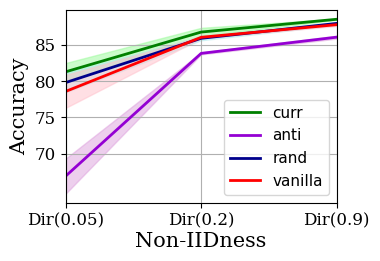

In [7]:
make_fig_line(table_av, table_sd, 
              'fmnist_lenet-5_linear0.8-0.2_gloss_scaffold_non-iidness')